# Task 3: MNIST Dataset

Modified National Institute of Standards and Technology
It consists of 60,000 training images and 10,000 test images. Each image is a crude 28 x 28 (784 pixels) handwritten digit from "0" to "9." Each pixel value is a grayscale integer between 0 and 255.

Set Up and Installations..

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.utils.multiclass import unique_labels
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Getting the Data...

In [ ]:
from torchvision.datasets import MNIST

mnist_raw = MNIST(root='./data/withouttransform', train=True, download=True, transform=None)

image, label = mnist_raw[0]

print(f"Label: {label}")
print("Raw Pixel Values (0-255):")
print(np.array(image))


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 20.7MB/s]


Extracting ./data/withouttransform/MNIST/raw/train-images-idx3-ubyte.gz to ./data/withouttransform/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 683kB/s]


Extracting ./data/withouttransform/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/withouttransform/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.84MB/s]


Extracting ./data/withouttransform/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/withouttransform/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 874kB/s]


Extracting ./data/withouttransform/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/withouttransform/MNIST/raw

Label: 5
Raw Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238

In [ ]:
# Define transformations
# The parameters mean, std are passed as 0.5, 0.5 in your case. This will normalize the image in the range [-1,1].
# For example, the minimum value 0 will be converted to (0-0.5)/0.5=-1, the maximum value of 1 will be converted to (1-0.5)/0.5=1.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load MNIST dataset using torchvision
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ../datasets/MNIST/raw/train-images-idx3-ubyte.gz to ../datasets/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 609kB/s]


Extracting ../datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.56MB/s]


Extracting ../datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.38MB/s]

Extracting ../datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/MNIST/raw



In [ ]:
# Get the first image and label from the dataset
image, label = train_dataset[0]

# Display the raw image and its pixel values
print(f"Label: {label}")
print("Raw Pixel Values (-1 - 1):")
print(np.array(image))


Label: 5
Raw Pixel Values (-1 - 1):
[[[-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1. 

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../datasets
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
print("Train data shape: ")
train_dataset.data.shape

Train data shape: 


torch.Size([60000, 28, 28])

In [ ]:
print("Test data shape: ")
test_dataset.data.shape

Test data shape: 


torch.Size([10000, 28, 28])

In [ ]:
# Flatten the images for sklearn MLP
X_train = train_dataset.data.numpy().reshape((len(train_dataset), -1))
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape((len(test_dataset), -1))
y_test = test_dataset.targets.numpy()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

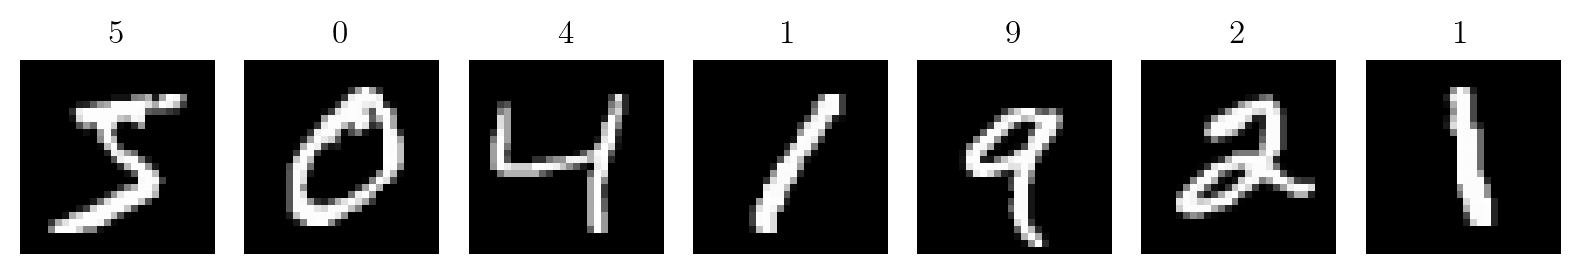

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

fig, axs = plt.subplots(1, 7, figsize=(8, 10))
for i in range(7):
    axs[i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
    axs[i].set_title(f'${y_train[i]}$', fontsize=12)  # Set title with LaTeX-style formatting
    axs[i].axis('off')

plt.tight_layout()
plt.show()


## Using sklearn..

I hidden layer, 100 neurons..

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=15, random_state=42, verbose=True)
mlp_model.fit(X_train_scaled, y_train)

y_probabilities = mlp_model.predict_proba(X_test_scaled)

y_pred = mlp_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Iteration 1, loss = 0.34997327
Iteration 2, loss = 0.14079123
Iteration 3, loss = 0.09575991
Iteration 4, loss = 0.07115329
Iteration 5, loss = 0.05505706
Iteration 6, loss = 0.04287497
Iteration 7, loss = 0.03379973
Iteration 8, loss = 0.02699543
Iteration 9, loss = 0.02237957
Iteration 10, loss = 0.01735595
Iteration 11, loss = 0.01418406
Iteration 12, loss = 0.01104682
Iteration 13, loss = 0.01042444
Iteration 14, loss = 0.00810184
Iteration 15, loss = 0.00606462
Accuracy: 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



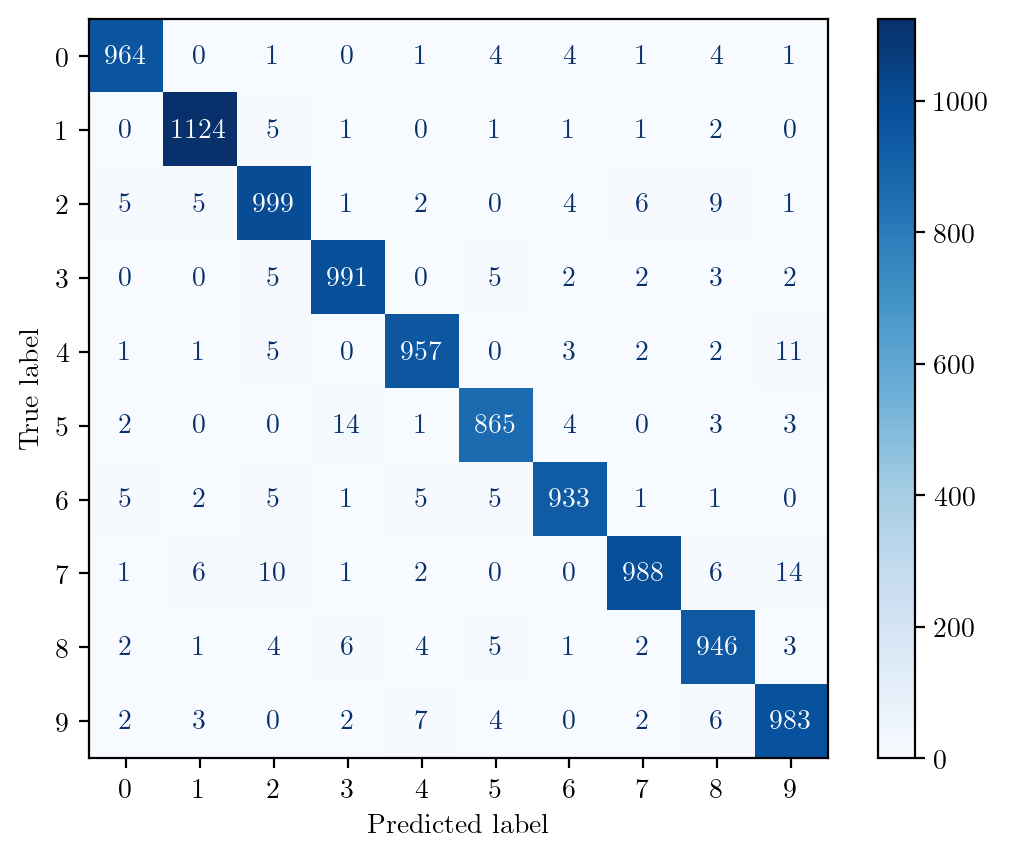

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2 Hidden Layer.. 30,20

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(30,20), max_iter=15, random_state=42, verbose=True)
mlp_model.fit(X_train_scaled, y_train)

y_probabilities = mlp_model.predict_proba(X_test_scaled)

y_pred = mlp_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Iteration 1, loss = 0.54851071
Iteration 2, loss = 0.20131761
Iteration 3, loss = 0.15396044
Iteration 4, loss = 0.12952547
Iteration 5, loss = 0.11236915
Iteration 6, loss = 0.09942510
Iteration 7, loss = 0.08970004
Iteration 8, loss = 0.07990547
Iteration 9, loss = 0.07241474
Iteration 10, loss = 0.06646129
Iteration 11, loss = 0.05972465
Iteration 12, loss = 0.05609688
Iteration 13, loss = 0.05096987
Iteration 14, loss = 0.04682911
Iteration 15, loss = 0.04437477
Accuracy: 0.9647


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.95      0.94       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



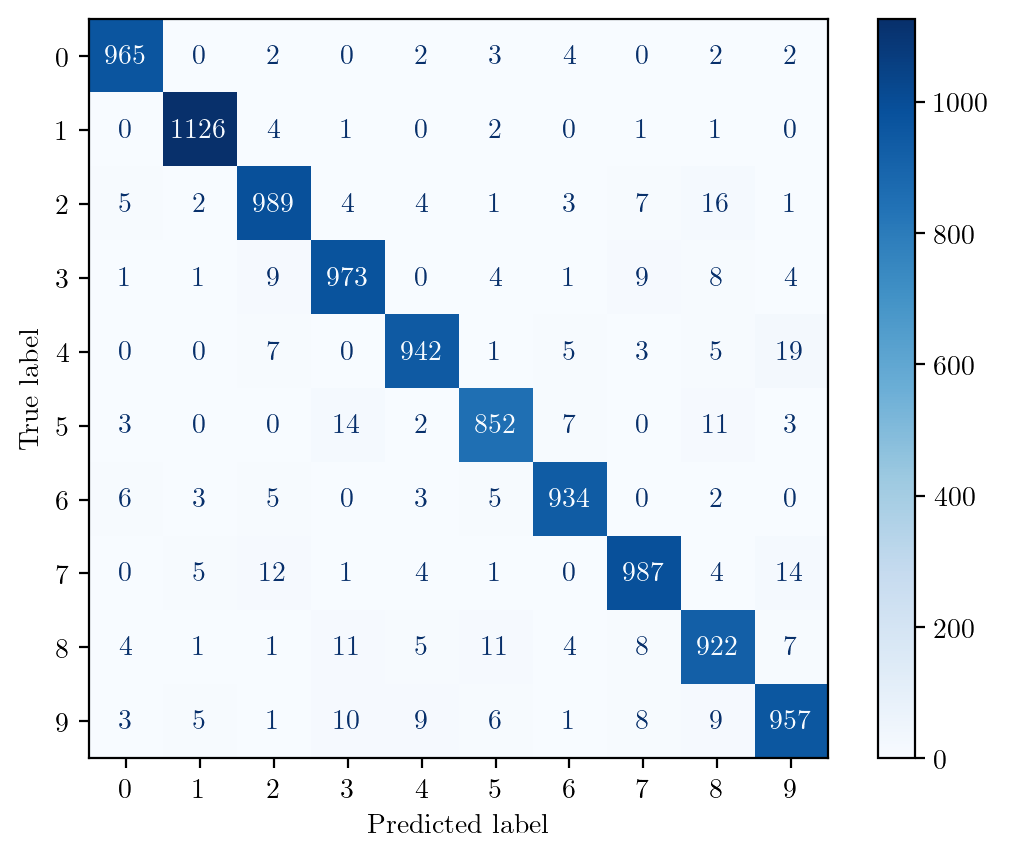

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

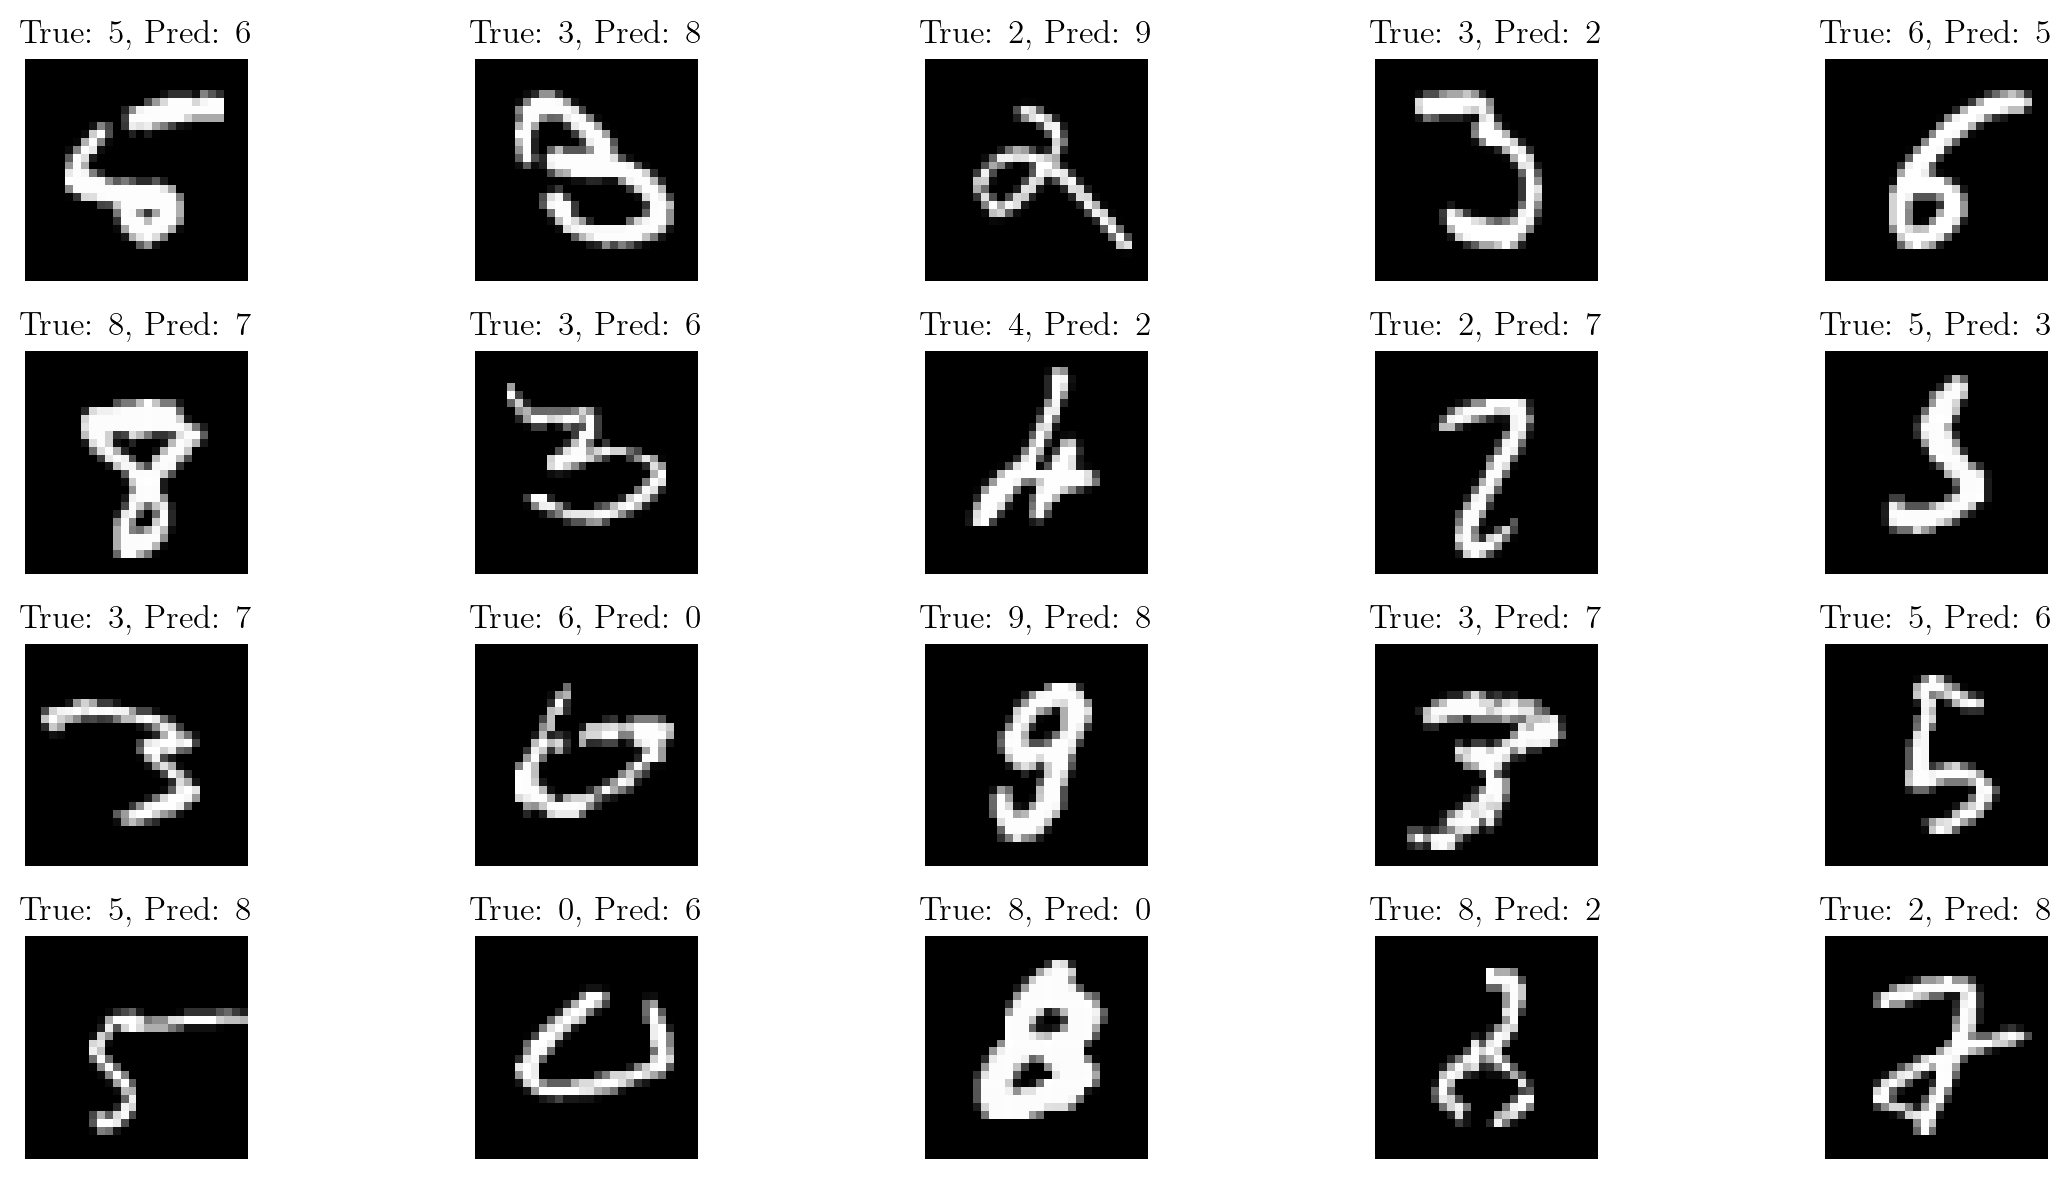

In [ ]:
incorrect_indices = np.where(y_pred != y_test)[0]

fig, axs = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    if i < len(incorrect_indices):
        idx = incorrect_indices[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
        ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
print("Number of misclassified images: ")
incorrect_indices.shape

Number of misclassified images: 


(353,)

In [ ]:
# #using unscaled images: less accuracy
# # Create and train the MLP model
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
# mlp_model.fit(X_train, y_train)

# # Predict probabilities on the test set
# y_probabilities = mlp_model.predict_proba(X_test)

# # Predict on the test set
# y_pred = mlp_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

## Using torch.nn now..

1 hidden layer.. 100

In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
        self.fc2 = nn.Linear(100, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(-1, 28 * 28)
        # Apply the layers and ReLU activations
        x = self.relu(self.fc1(x))  # First hidden layer + ReLU
        x = self.fc2(x)  # Second hidden layer + ReLU
        # x = self.fc3(x)  # Output layer (no activation because we'll use CrossEntropyLoss)
        return x

# Instantiate the model
# model = MLP()


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
model = MLP();
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 15

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/15, Loss: 0.2485
Epoch 2/15, Loss: 0.1076
Epoch 3/15, Loss: 0.0707
Epoch 4/15, Loss: 0.0518
Epoch 5/15, Loss: 0.0391
Epoch 6/15, Loss: 0.0307
Epoch 7/15, Loss: 0.0226
Epoch 8/15, Loss: 0.0201
Epoch 9/15, Loss: 0.0169
Epoch 10/15, Loss: 0.0128
Epoch 11/15, Loss: 0.0128
Epoch 12/15, Loss: 0.0179
Epoch 13/15, Loss: 0.0151
Epoch 14/15, Loss: 0.0116
Epoch 15/15, Loss: 0.0098


In [ ]:
# Ensure your model is in evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculation (not needed during evaluation)
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: Get model predictions
        outputs = model(images)
        # Get the predicted class (the class with the highest score)
        _, predicted = torch.max(outputs.data, 1)
        # Store predictions and true labels
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# import numpy as np

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


In [ ]:
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9738


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for MLP
report_mlp = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
print("\nMLP Classification Report:")
print(report_mlp)



MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



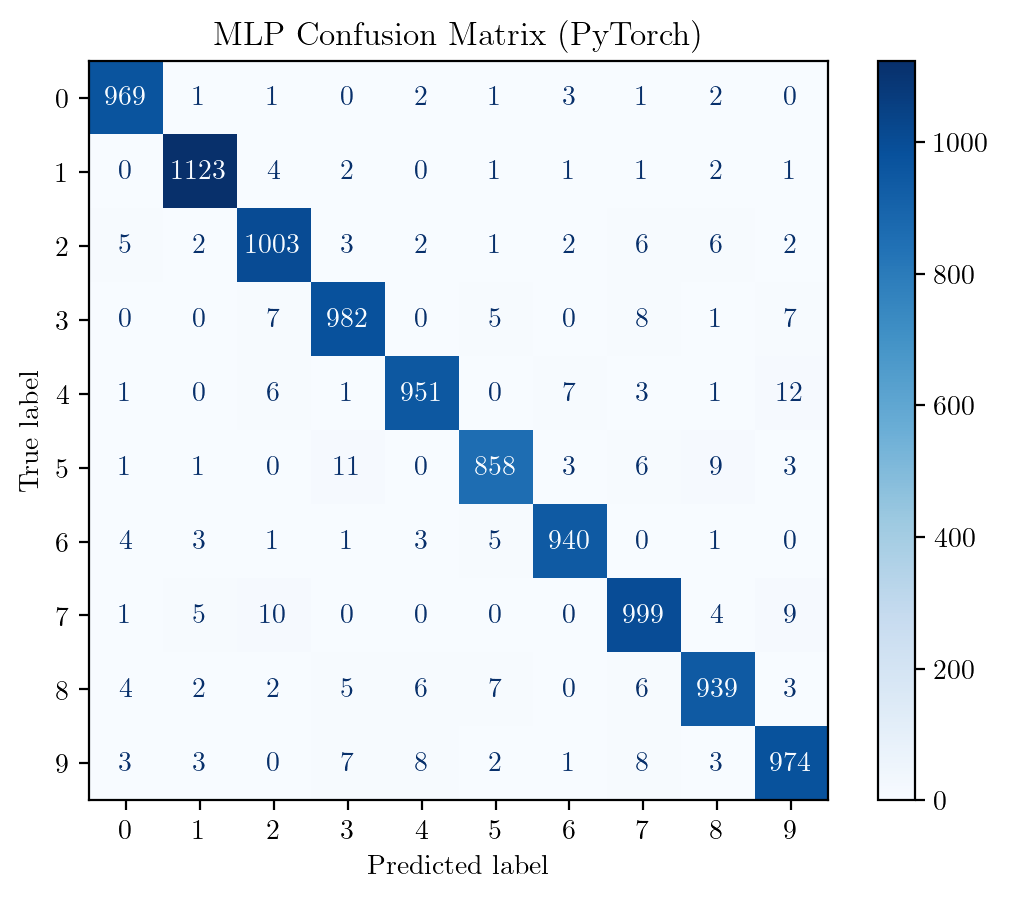

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_mlp = confusion_matrix(all_labels, all_preds)

disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title("MLP Confusion Matrix (PyTorch)")
plt.show()


In [ ]:
incorrect_indices = np.where(y_pred != y_test)[0]
incorrect_indices.shape

(353,)

In [ ]:
# Training loop 30 epochs
model1 = MLP()
optimizer = optim.Adam(model1.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 30

for epoch in range(n_epochs):
    model1.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model1(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/30, Loss: 0.2454
Epoch 2/30, Loss: 0.1054
Epoch 3/30, Loss: 0.0690
Epoch 4/30, Loss: 0.0491
Epoch 5/30, Loss: 0.0386
Epoch 6/30, Loss: 0.0291
Epoch 7/30, Loss: 0.0225
Epoch 8/30, Loss: 0.0189
Epoch 9/30, Loss: 0.0184
Epoch 10/30, Loss: 0.0138
Epoch 11/30, Loss: 0.0105
Epoch 12/30, Loss: 0.0090
Epoch 13/30, Loss: 0.0081
Epoch 14/30, Loss: 0.0102
Epoch 15/30, Loss: 0.0122
Epoch 16/30, Loss: 0.0103
Epoch 17/30, Loss: 0.0064
Epoch 18/30, Loss: 0.0061
Epoch 19/30, Loss: 0.0105
Epoch 20/30, Loss: 0.0104
Epoch 21/30, Loss: 0.0051
Epoch 22/30, Loss: 0.0119
Epoch 23/30, Loss: 0.0109
Epoch 24/30, Loss: 0.0124
Epoch 25/30, Loss: 0.0087
Epoch 26/30, Loss: 0.0055
Epoch 27/30, Loss: 0.0025
Epoch 28/30, Loss: 0.0037
Epoch 29/30, Loss: 0.0042
Epoch 30/30, Loss: 0.0099


In [ ]:
# Evaluation on test data 30 epochs: overfit...
model1.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.9756


In [ ]:
from sklearn.metrics import classification_report

# Gather predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculation for faster prediction
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    for images, labels in test_loader:
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
# Generate classification report
report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
print(report)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



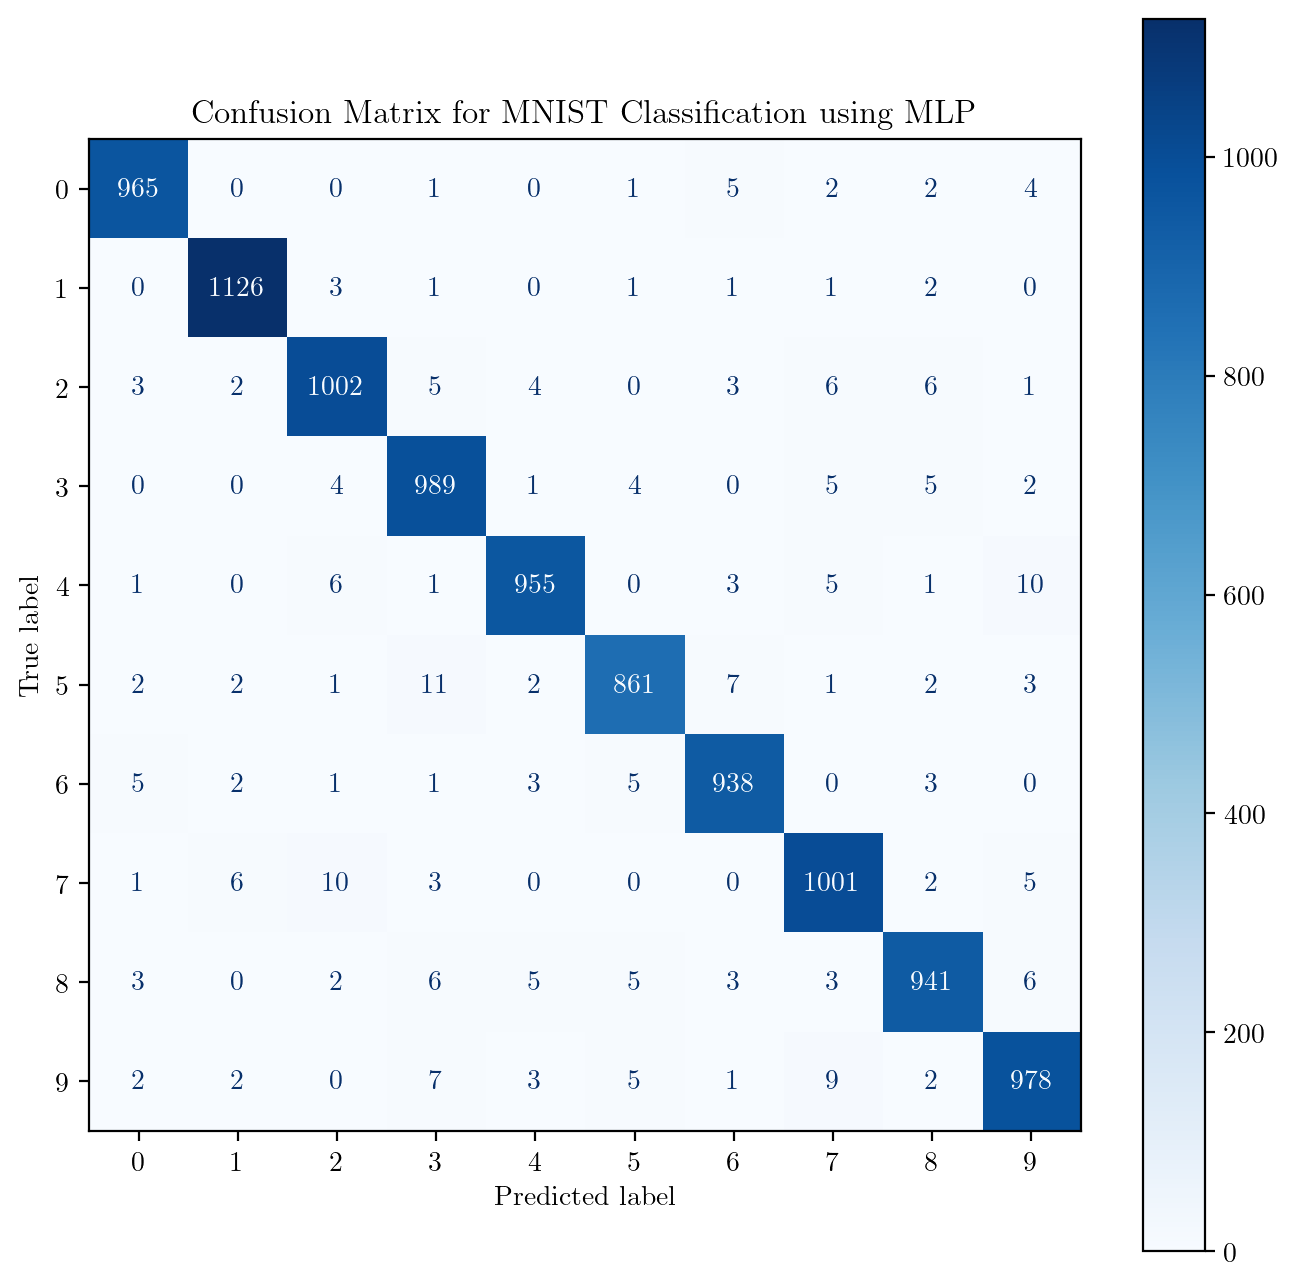

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))  # Set figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues', ax=ax, values_format='d')

plt.title("Confusion Matrix for MNIST Classification using MLP")
plt.show()

## Random Forest Model now..

Random Forest Accuracy: 0.9704

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



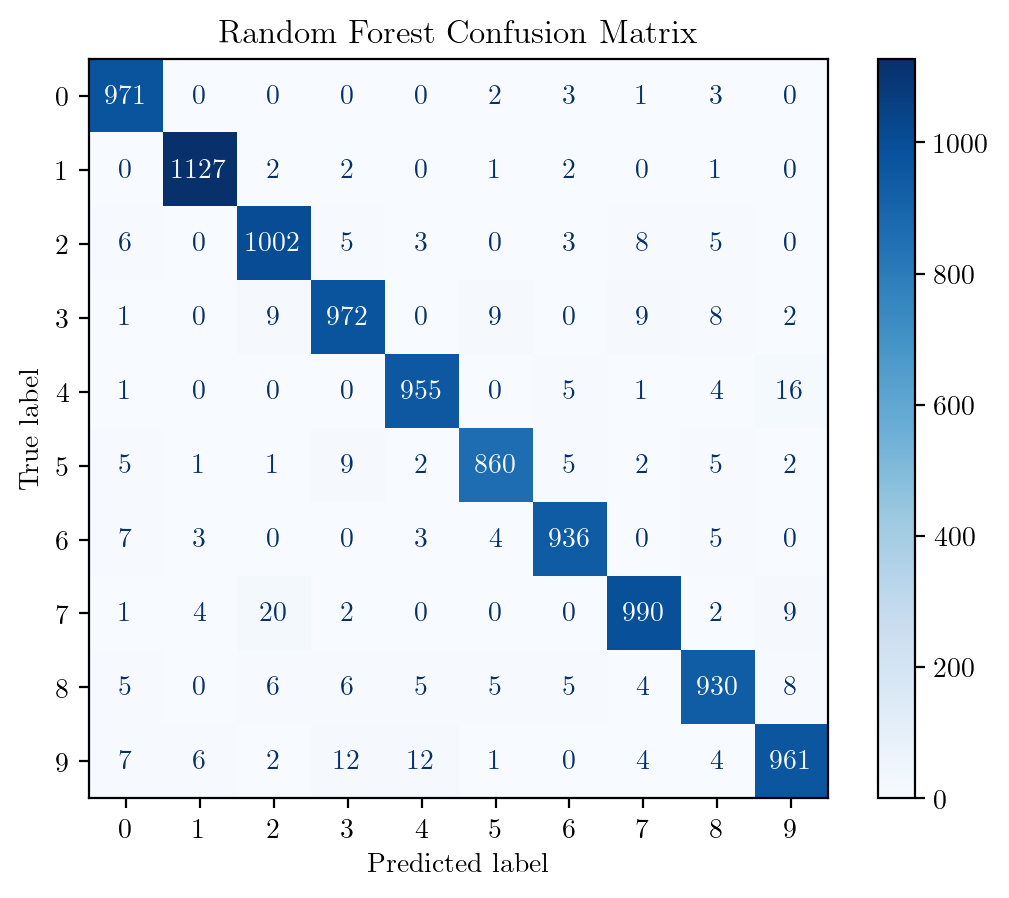

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


## Logistic Regression code now..

Logistic Regression Accuracy: 0.9214

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



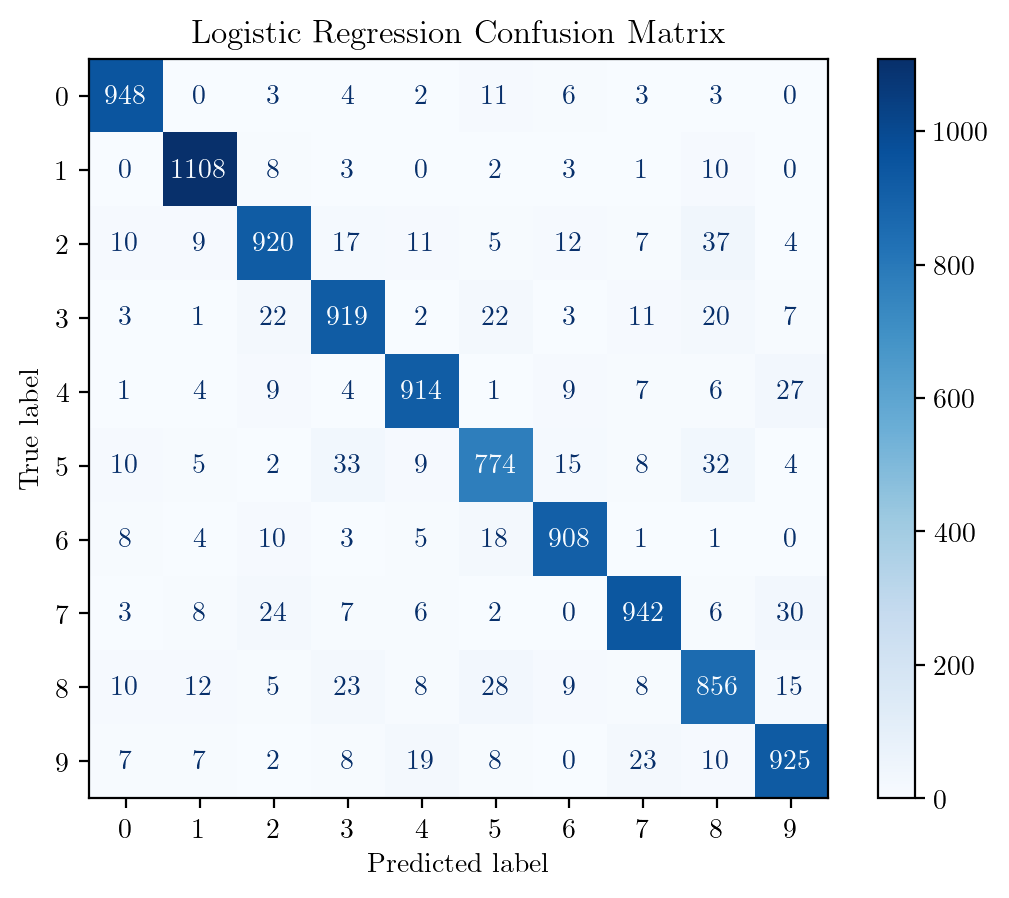

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Convert classification report to DataFrame
def classification_report_to_df(report):
    report_data = []
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            report_data.append({
                'Label': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            })
    return pd.DataFrame(report_data)

report_mlp_dict = classification_report(all_labels, all_preds, output_dict=True)
report_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True)
report_lr_dict = classification_report(y_test, y_pred_lr, output_dict=True)

# Convert the classification reports to DataFrames
df_mlp = classification_report_to_df(report_mlp_dict)
df_rf = classification_report_to_df(report_rf_dict)
df_lr = classification_report_to_df(report_lr_dict)

# Combine the reports side by side
df_combined = pd.concat([df_mlp.set_index('Label'),
                         df_rf.set_index('Label'),
                         df_lr.set_index('Label')], axis=1)

# Rename the columns to indicate the models
df_combined.columns = ['MLP Precision', 'MLP Recall', 'MLP F1-Score', 'MLP Support',
                       'RF Precision', 'RF Recall', 'RF F1-Score', 'RF Support',
                       'LR Precision', 'LR Recall', 'LR F1-Score', 'LR Support']

print(df_combined)


              MLP Precision  MLP Recall  MLP F1-Score  MLP Support  \
Label                                                                
0                  0.982688    0.984694      0.983690        980.0   
1                  0.987719    0.992070      0.989890       1135.0   
2                  0.973761    0.970930      0.972344       1032.0   
3                  0.964878    0.979208      0.971990       1010.0   
4                  0.981501    0.972505      0.976982        982.0   
5                  0.976190    0.965247      0.970688        892.0   
6                  0.976067    0.979123      0.977592        958.0   
7                  0.969022    0.973735      0.971373       1028.0   
8                  0.974120    0.966119      0.970103        974.0   
9                  0.969277    0.969277      0.969277       1009.0   
macro avg          0.975522    0.975291      0.975393      10000.0   
weighted avg       0.975616    0.975600      0.975595      10000.0   

              RF Pr

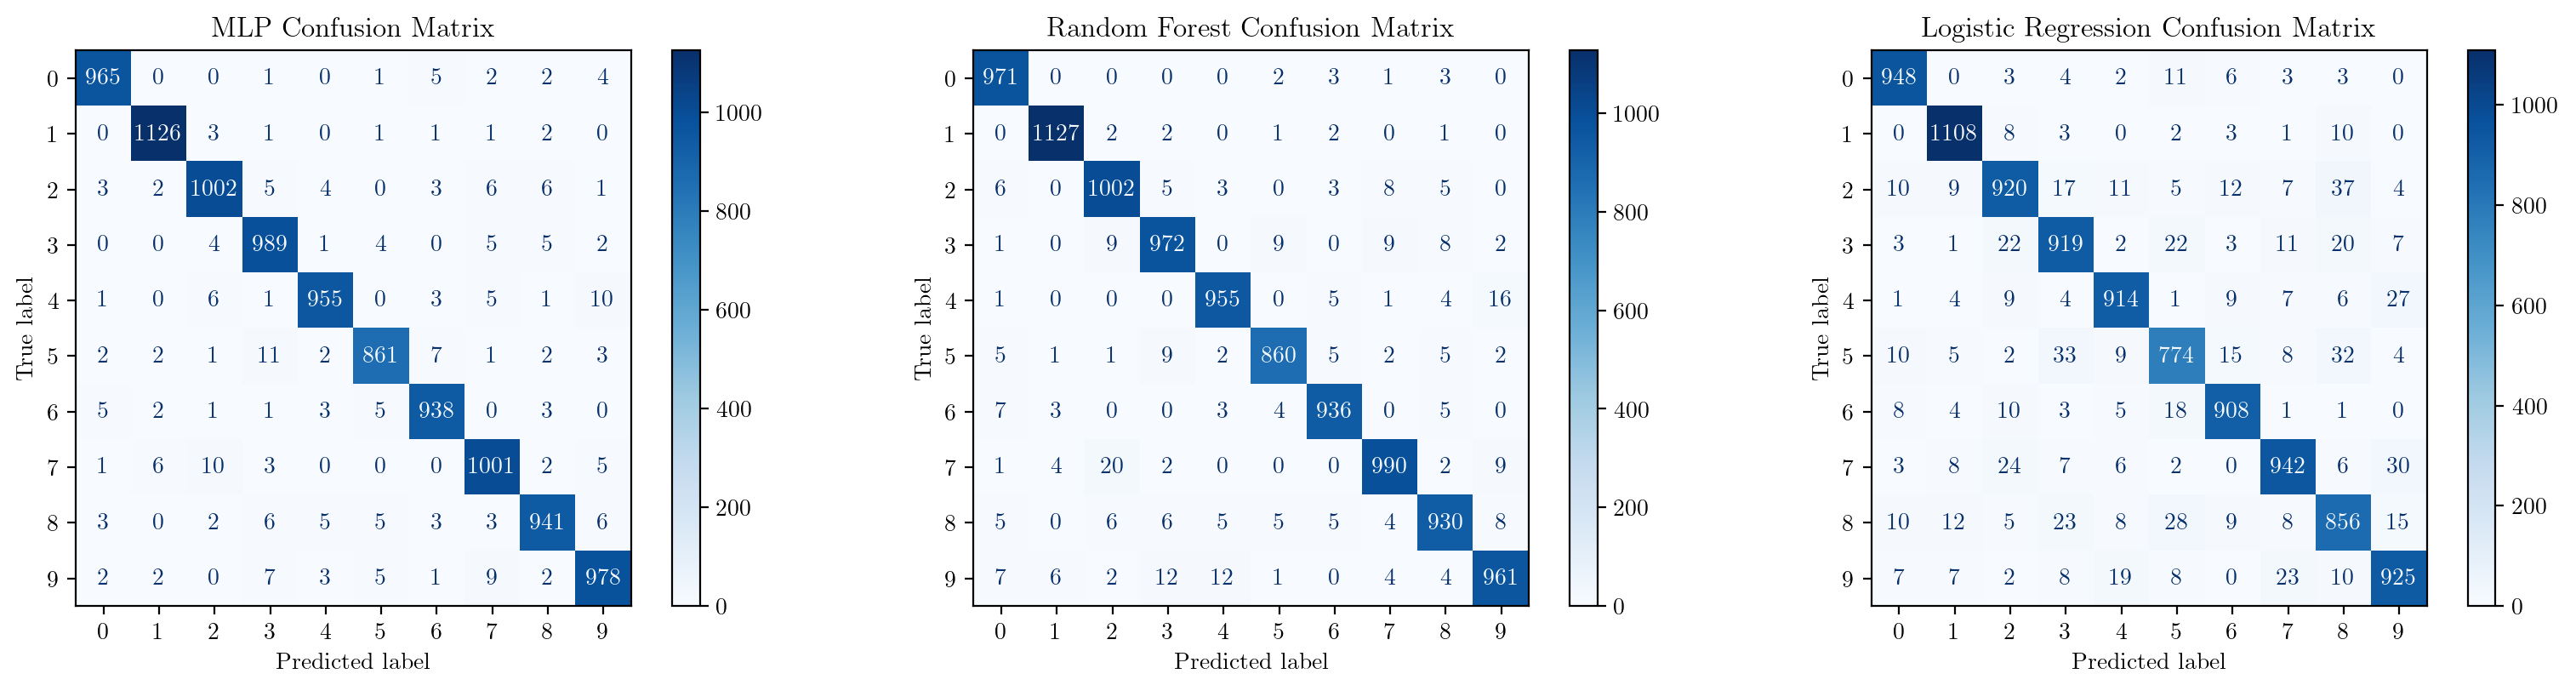

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot all confusion matrices side by side
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Confusion Matrix for MLP
ConfusionMatrixDisplay.from_predictions(all_labels, all_preds, ax=axs[0], cmap='Blues')
axs[0].set_title("MLP Confusion Matrix")

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axs[1], cmap='Blues')
axs[1].set_title("Random Forest Confusion Matrix")

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axs[2], cmap='Blues')
axs[2].set_title("Logistic Regression Confusion Matrix")

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# MLP Accuracy (PyTorch)
accuracy_mlp = accuracy_score(all_labels, all_preds)

# Random Forest Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Logistic Regression Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print all accuracies together
print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")


MLP Accuracy: 0.9756
Random Forest Accuracy: 0.9704
Logistic Regression Accuracy: 0.9214


### Misclassified Digits: >=9

MLP: (5,3) (7,2) (7,9) (9,3) (9,4)

RF: (3,2) (3,5) (3,7) (4,9) (5,3) (7,2) (9,3) (9,4)

LR: (0,5) (1,8) (2,10 (2,1) (2,3) (2,4) (2,6),(2,8) (3,2) (3,5) (3,7) (3,8)...

### Accuracy Comparison:
MLP (PyTorch) > RF > Logistic Regression
Because, MLP has deeper layers and hence it can learn complex non linearity as well. Random Forests do perform well on classificatoin tasks, but they dont capture spatial relationships in images. Logistic Regression is a simple model, it doesn't capture the non-linear relationships that exist in image data.

### Confusion Matrix Observations:
MLP (PyTorch): The confusion matrix for MLP shows fewer off-diagonal elements compared to Random Forest and Logistic Regression, indicating fewer misclassifications.

Random Forest: While Random Forest performs well in general, the confusion matrix shows more off-diagonal elements compared to MLP, especially for digits that are visually similar (such as 4 and 9, or 3 and 5).

Logistic Regression: The confusion matrix for Logistic Regression has the most off-diagonal elements, meaning it misclassifies certain digits more frequently.

### Classification Report (Precision, Recall, F1-Score):
MLP (PyTorch): The MLP generally scores the highest in terms of precision, recall, and F1-score across all digits. This shows that MLP is good at both correctly identifying each class (precision) and capturing most of the relevant instances (recall), leading to a balanced F1-score.

Random Forest: The classification report shows good performance overall but slightly lower precision and recall compared to MLP.

Logistic Regression: Logistic Regression shows the lowest precision and recall, particularly for digits that have more complex shapes or are similar to other digits (like 3, 5, and 8).

Hence, MLP (PyTorch) outperforms both Random Forest and Logistic Regression: Due to its ability to model non-linear relationships and extract hierarchical features from the image data, MLP achieves the highest accuracy, precision, recall, and F1-scores. It also shows the least confusion in distinguishing between similar digits.


## now using given network architeccture..

30 neurons in first layer, 20 in second layer and then 10 finally for the output layer (corresponding to 10 classes)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
model = MLP();
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate 0.001
n_epochs = 20

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/20, Loss: 0.2441
Epoch 2/20, Loss: 0.1029
Epoch 3/20, Loss: 0.0685
Epoch 4/20, Loss: 0.0489
Epoch 5/20, Loss: 0.0352
Epoch 6/20, Loss: 0.0292
Epoch 7/20, Loss: 0.0222
Epoch 8/20, Loss: 0.0177
Epoch 9/20, Loss: 0.0145
Epoch 10/20, Loss: 0.0140
Epoch 11/20, Loss: 0.0145
Epoch 12/20, Loss: 0.0117
Epoch 13/20, Loss: 0.0094
Epoch 14/20, Loss: 0.0067
Epoch 15/20, Loss: 0.0068
Epoch 16/20, Loss: 0.0132
Epoch 17/20, Loss: 0.0202
Epoch 18/20, Loss: 0.0057
Epoch 19/20, Loss: 0.0073
Epoch 20/20, Loss: 0.0084


In [ ]:
# Ensure your model is in evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculation (not needed during evaluation)
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: Get model predictions
        outputs = model(images)
        # Get the predicted class (the class with the highest score)
        _, predicted = torch.max(outputs.data, 1)
        # Store predictions and true labels
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# import numpy as np

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy_mlp = accuracy_score(all_labels, all_preds)
accuracy_mlp

0.9752

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for MLP
report_mlp = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])
print("\nMLP Classification Report:")
print(report_mlp)



MLP Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.97      0.98      0.97     10000
weighted avg       0.98      0.98      0.98     10000



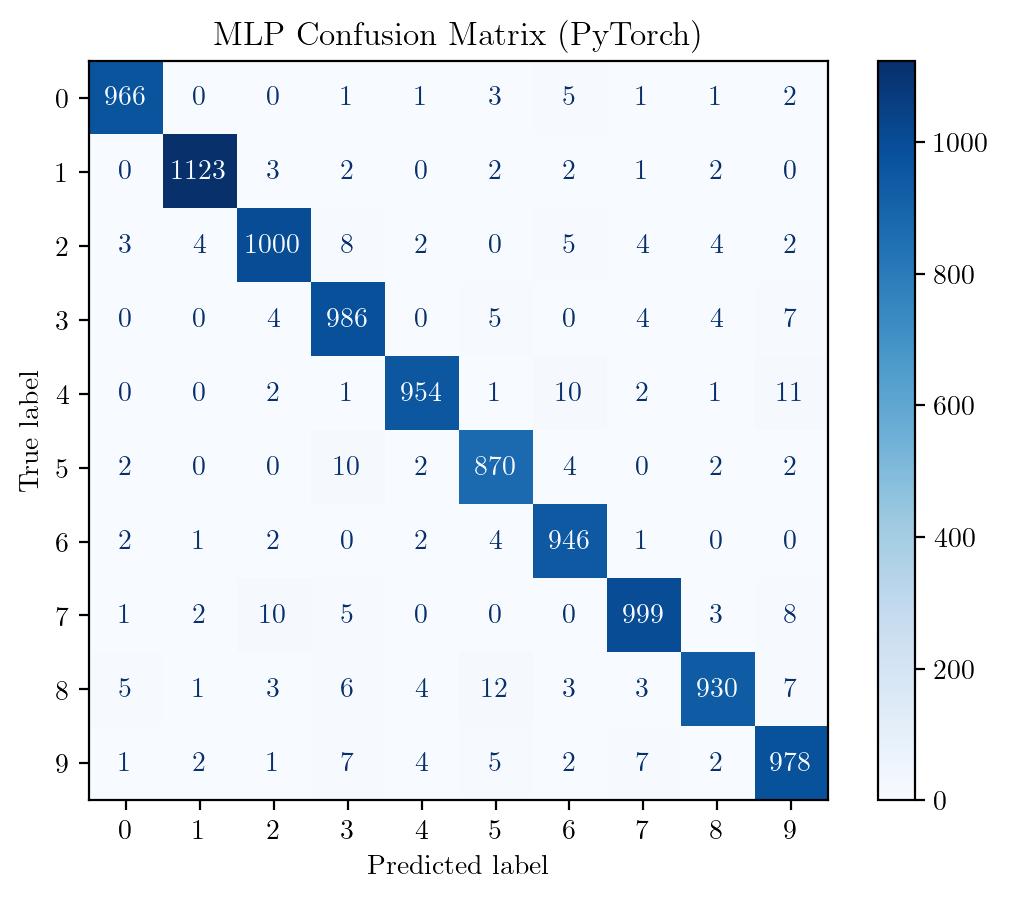

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for MLP Model
cm_mlp = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title("MLP Confusion Matrix (PyTorch)")
plt.show()


## tsne now..

In [ ]:
# Define the MLP model with 30 neurons in the first layer and 20 neurons in the second layer
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # First hidden layer (30 neurons)
        self.fc1 = nn.Linear(28 * 28, 30)
        # Second hidden layer (20 neurons)
        self.fc2 = nn.Linear(30, 20)
        # Output layer (10 neurons for 10 digit classes)
        self.fc3 = nn.Linear(20, 10)
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x, return_hidden=False):
        # Flatten the input (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(-1, 28 * 28)
        # Apply the layers and ReLU activations
        x = self.relu(self.fc1(x))  # First hidden layer + ReLU
        hidden = self.relu(self.fc2(x))  # Second hidden layer + ReLU
        if return_hidden:
            return hidden  # Return the output from the second hidden layer
        x = self.fc3(hidden)
        return x

# Instantiate the model (assuming you have trained this model already)
model_trained = MLP()


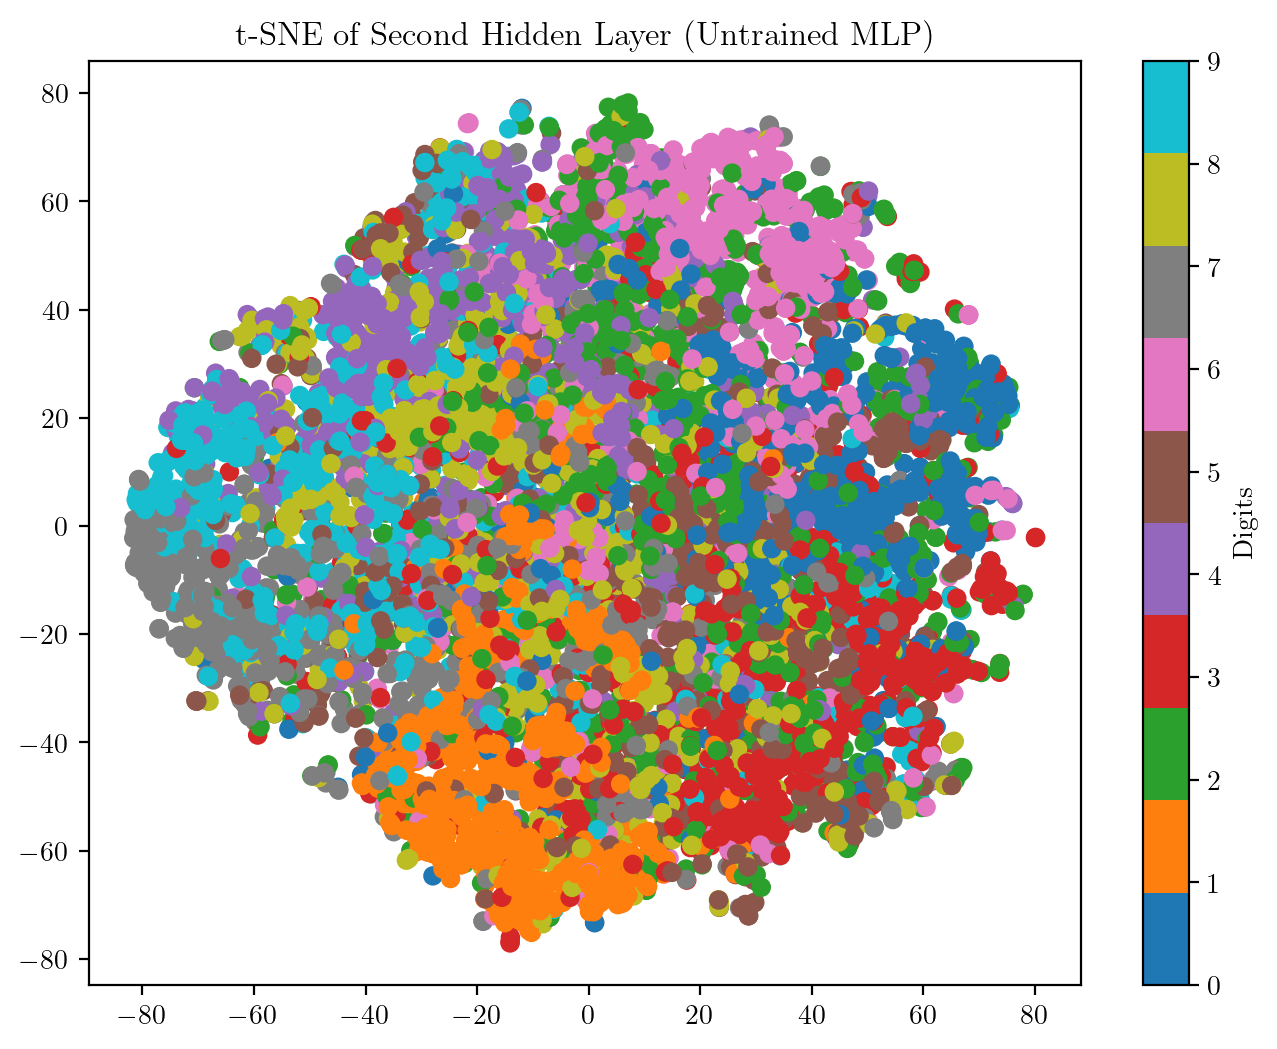

In [ ]:
model_untrained = MLP()
# Extract features from the untrained model for the test set
from sklearn.manifold import TSNE
model_untrained.eval()
hidden_representations_untrained = []

with torch.no_grad():
    for images, labels in test_loader:
        hidden = model_untrained(images, return_hidden=True)  # Get hidden layer output from untrained model
        hidden_representations_untrained.append(hidden.cpu().numpy())

hidden_representations_untrained = np.concatenate(hidden_representations_untrained, axis=0)

# Apply t-SNE to reduce dimensionality from 20 to 2 for visualization (untrained model)
tsne_untrained = TSNE(n_components=2, random_state=42)
tsne_results_untrained = tsne_untrained.fit_transform(hidden_representations_untrained)

# Plot t-SNE for the untrained model
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results_untrained[:, 0], tsne_results_untrained[:, 1], c=all_labels, cmap='tab10')
plt.title("t-SNE of Second Hidden Layer (Untrained MLP)")
plt.colorbar(scatter, ticks=range(10), label='Digits')
plt.show()


In [ ]:
import torchvision
import torchvision.transforms as transforms

# Define transformations (same as MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion-MNIST dataset
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='../datasets', train=False, download=True, transform=transform)

# Create a DataLoader for Fashion-MNIST (similar to MNIST)
fashion_test_loader = torch.utils.data.DataLoader(fashion_mnist_test, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]


Extracting ../datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../datasets/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 224kB/s]


Extracting ../datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.22MB/s]


Extracting ../datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.16MB/s]

Extracting ../datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/raw



In [ ]:
import torchvision.transforms as transforms

# Define transformations (same for both datasets)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion-MNIST dataset (test only, as we are testing generalization)
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for Fashion-MNIST test set
fashion_test_loader = DataLoader(fashion_mnist_test, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 222kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:04<00:00, 962kB/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.30MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



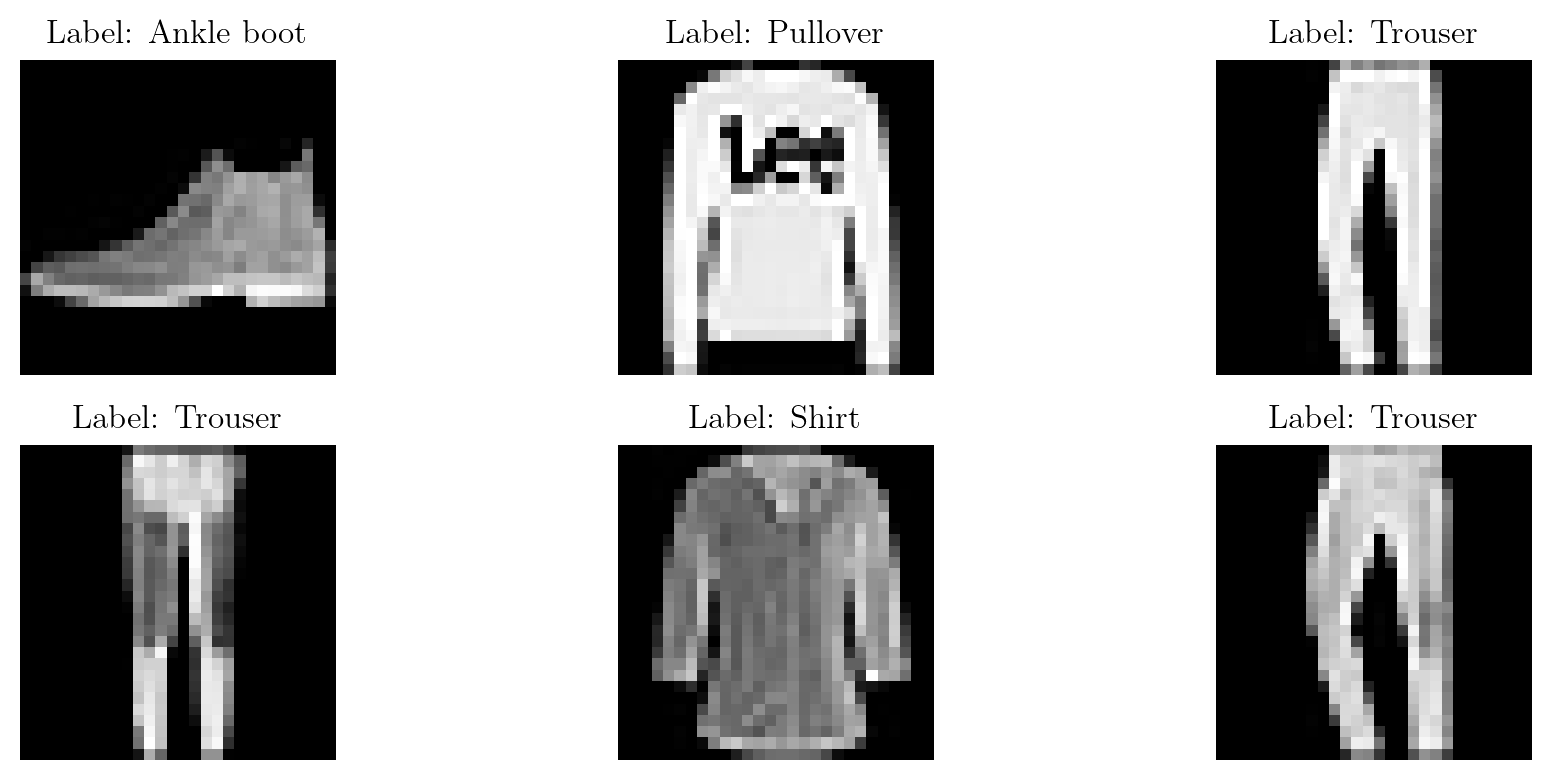

In [ ]:
data_iter = iter(fashion_test_loader)
images, labels = next(data_iter)
# Class labels for Fashion-MNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images in a grid
plt.figure(figsize=(10,4))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {classes[labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Ensure the trained model is in evaluation mode
model_untrained.eval()

fashion_hidden_representations = []
fashion_labels = []

# Extract the output from the second hidden layer for Fashion-MNIST
with torch.no_grad():
    for images, labels in fashion_test_loader:
        hidden = model_untrained(images, return_hidden=True)  # Extract second hidden layer
        fashion_hidden_representations.append(hidden.cpu().numpy())
        fashion_labels.extend(labels.cpu().numpy())

fashion_hidden_representations = np.concatenate(fashion_hidden_representations, axis=0)
fashion_labels = np.array(fashion_labels)


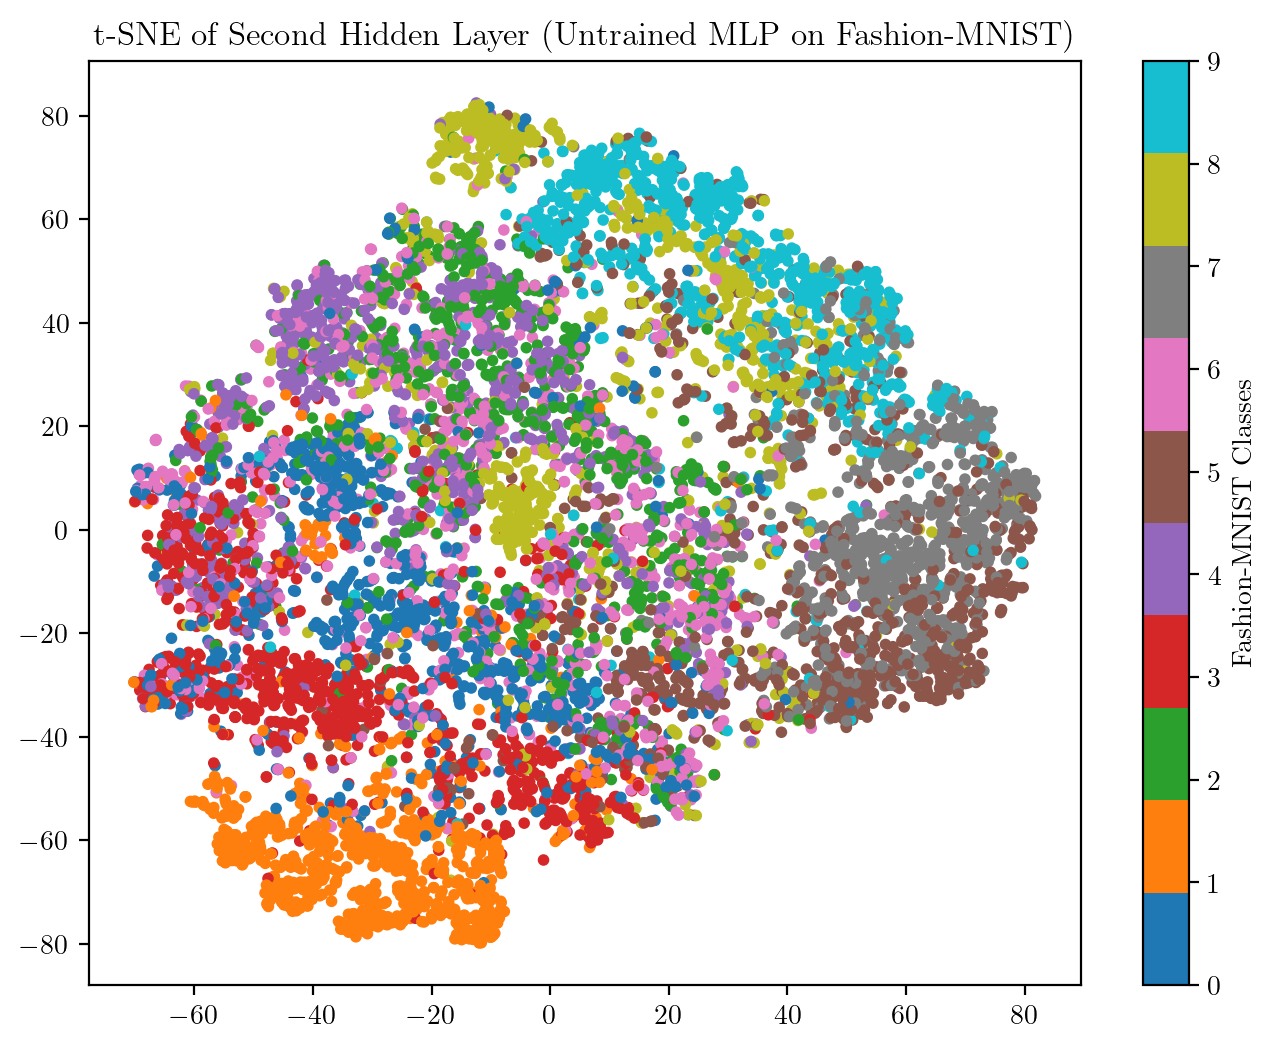

In [ ]:
# Apply t-SNE to the Fashion-MNIST embeddings (from the second hidden layer)
tsne_fashion = TSNE(n_components=2, random_state=42)
tsne_results_fashion = tsne_fashion.fit_transform(fashion_hidden_representations)

# Plot t-SNE for the Fashion-MNIST dataset
plt.figure(figsize=(8, 6))
scatter_fashion = plt.scatter(tsne_results_fashion[:, 0], tsne_results_fashion[:, 1],
                              c=fashion_labels, cmap='tab10', s=10)
plt.title("t-SNE of Second Hidden Layer (Untrained MLP on Fashion-MNIST)")
plt.colorbar(scatter_fashion, ticks=range(10), label='Fashion-MNIST Classes')
plt.show()


In [ ]:
model_trained = MLP()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_trained.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model_trained.train()
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass: get the model's predictions
        outputs = model_trained(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/10, Loss: 0.3821
Epoch 2/10, Loss: 0.5429
Epoch 3/10, Loss: 0.6675
Epoch 4/10, Loss: 0.7716
Epoch 5/10, Loss: 0.8620
Epoch 6/10, Loss: 0.9401
Epoch 7/10, Loss: 1.0098
Epoch 8/10, Loss: 1.0731
Epoch 9/10, Loss: 1.1309
Epoch 10/10, Loss: 1.1842


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Ensure the model is in evaluation mode
model_trained.eval()

# Initialize lists to store predictions and true labels
all_preds_fashion = []
all_labels_fashion = []

# Predict on Fashion-MNIST and store predictions and true labels
with torch.no_grad():
    for images, labels in fashion_test_loader:
        outputs = model_trained(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_fashion.extend(predicted.cpu().numpy())
        all_labels_fashion.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds_fashion = np.array(all_preds_fashion)
all_labels_fashion = np.array(all_labels_fashion)

# Measure accuracy
accuracy_fashion = accuracy_score(all_labels_fashion, all_preds_fashion)
print(f"Accuracy on Fashion-MNIST: {accuracy_fashion:.4f}")

# Print classification report
print("\nClassification Report for Fashion-MNIST:")
print(classification_report(all_labels_fashion, all_preds_fashion))

Accuracy on Fashion-MNIST: 0.0996

Classification Report for Fashion-MNIST:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      1.00      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


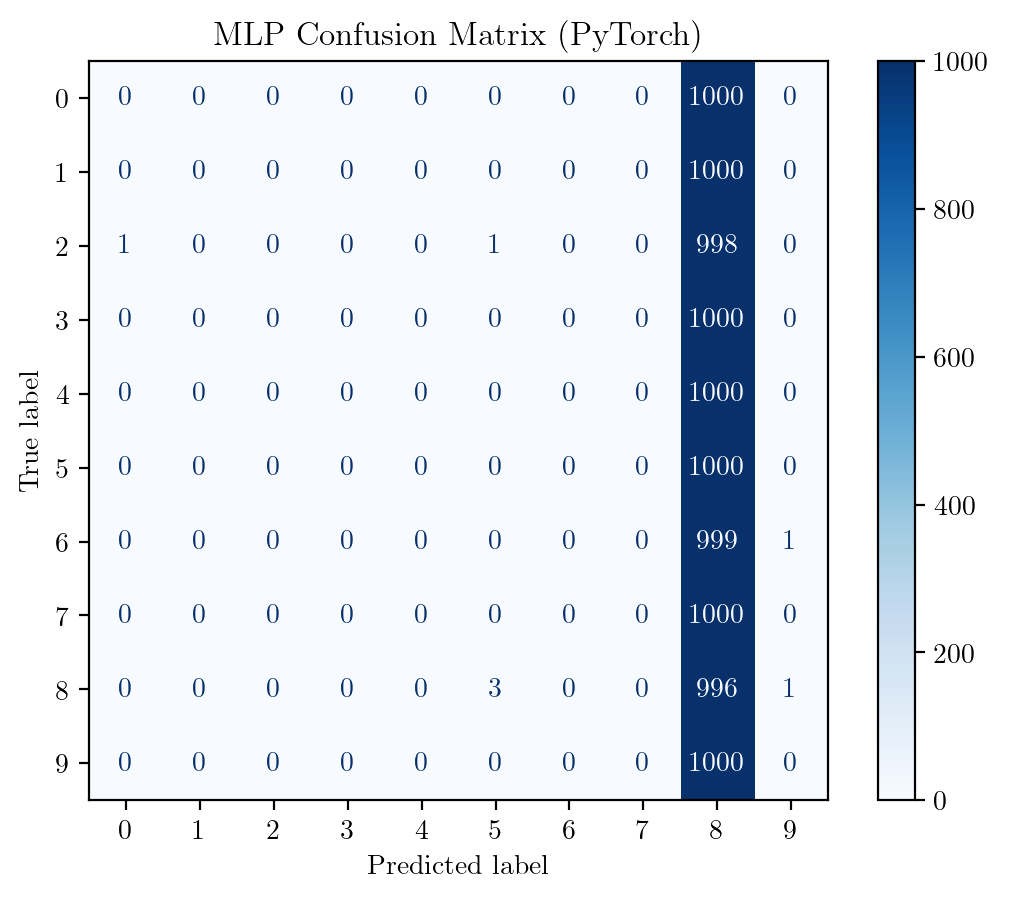

In [ ]:
# Confusion Matrix for MLP Model
cm_mlp = confusion_matrix(all_labels_fashion, all_preds_fashion)

# Plot the confusion matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title("MLP Confusion Matrix (PyTorch)")
plt.show()

In [ ]:
# import torch.utils.data
import numpy as np

# Ensure the model is in evaluation mode
model_trained.eval()

# Initialize lists to store the second hidden layer output and true labels for MNIST and Fashion-MNIST
mnist_hidden_representations = []
fashion_hidden_representations = []
mnist_labels = []
fashion_labels = []

# Extract second hidden layer outputs for MNIST test set
with torch.no_grad():
    for images, labels in test_loader:  # Assuming mnist_test_loader is already defined
        hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
        mnist_hidden_representations.append(hidden.cpu().numpy())
        mnist_labels.extend(labels.cpu().numpy())

# Extract second hidden layer outputs for Fashion-MNIST test set
with torch.no_grad():
    for images, labels in fashion_test_loader:  # Assuming fashion_test_loader is already defined
        hidden = model_trained(images, return_hidden=True)  # Extract second hidden layer
        fashion_hidden_representations.append(hidden.cpu().numpy())
        fashion_labels.extend(labels.cpu().numpy())

# Convert the lists to NumPy arrays
mnist_hidden_representations = np.concatenate(mnist_hidden_representations, axis=0)
fashion_hidden_representations = np.concatenate(fashion_hidden_representations, axis=0)
mnist_labels = np.array(mnist_labels)
fashion_labels = np.array(fashion_labels)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to MNIST hidden layer outputs
tsne_mnist = TSNE(n_components=2, random_state=42)
tsne_results_mnist = tsne_mnist.fit_transform(mnist_hidden_representations)

# Apply t-SNE to Fashion-MNIST hidden layer outputs
tsne_fashion = TSNE(n_components=2, random_state=42)
tsne_results_fashion = tsne_fashion.fit_transform(fashion_hidden_representations)


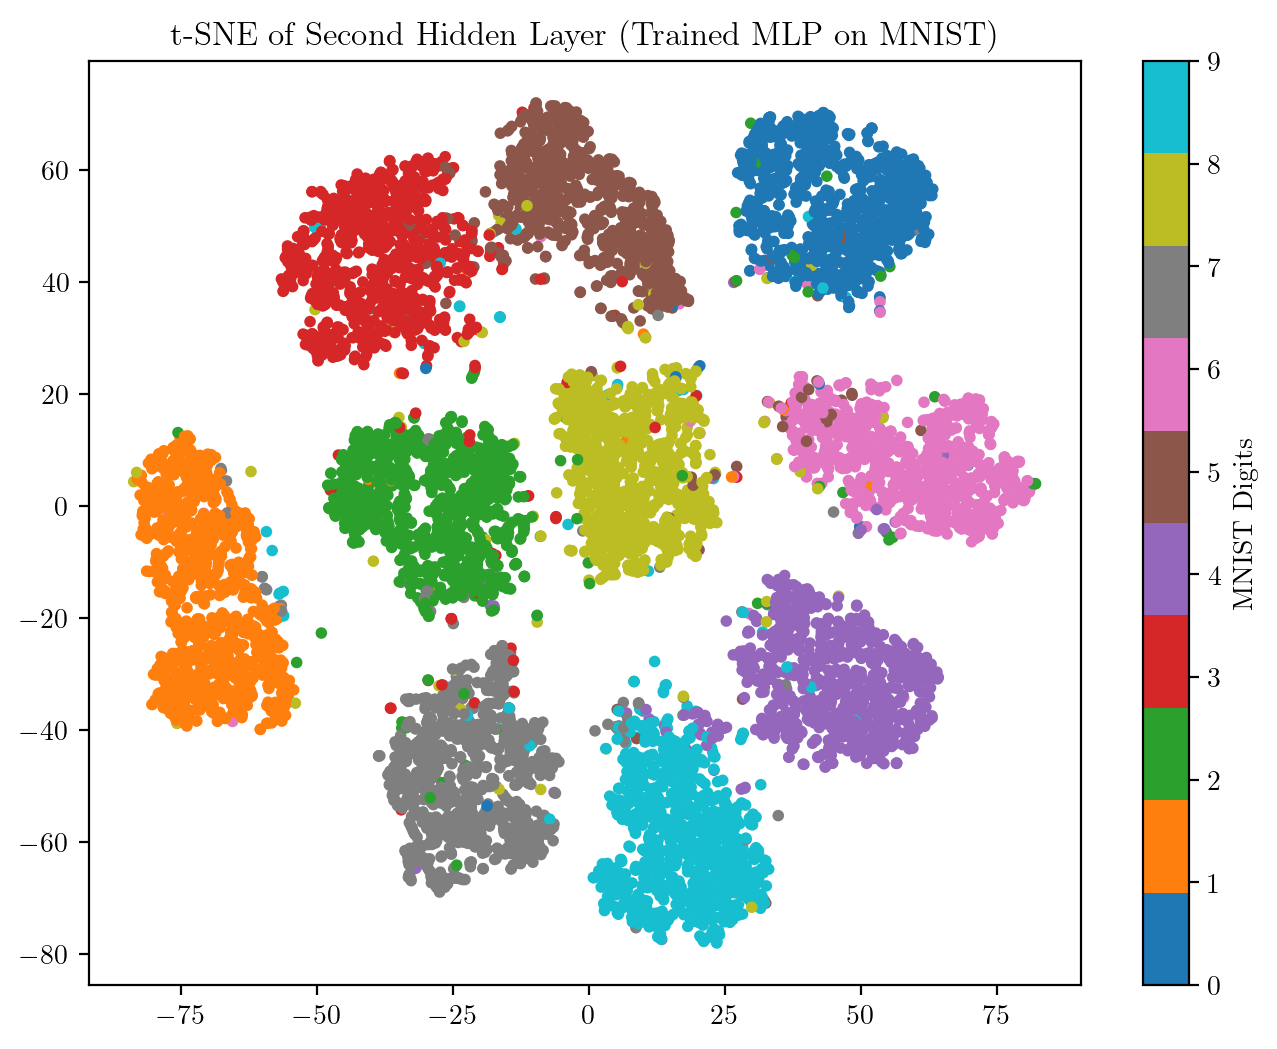

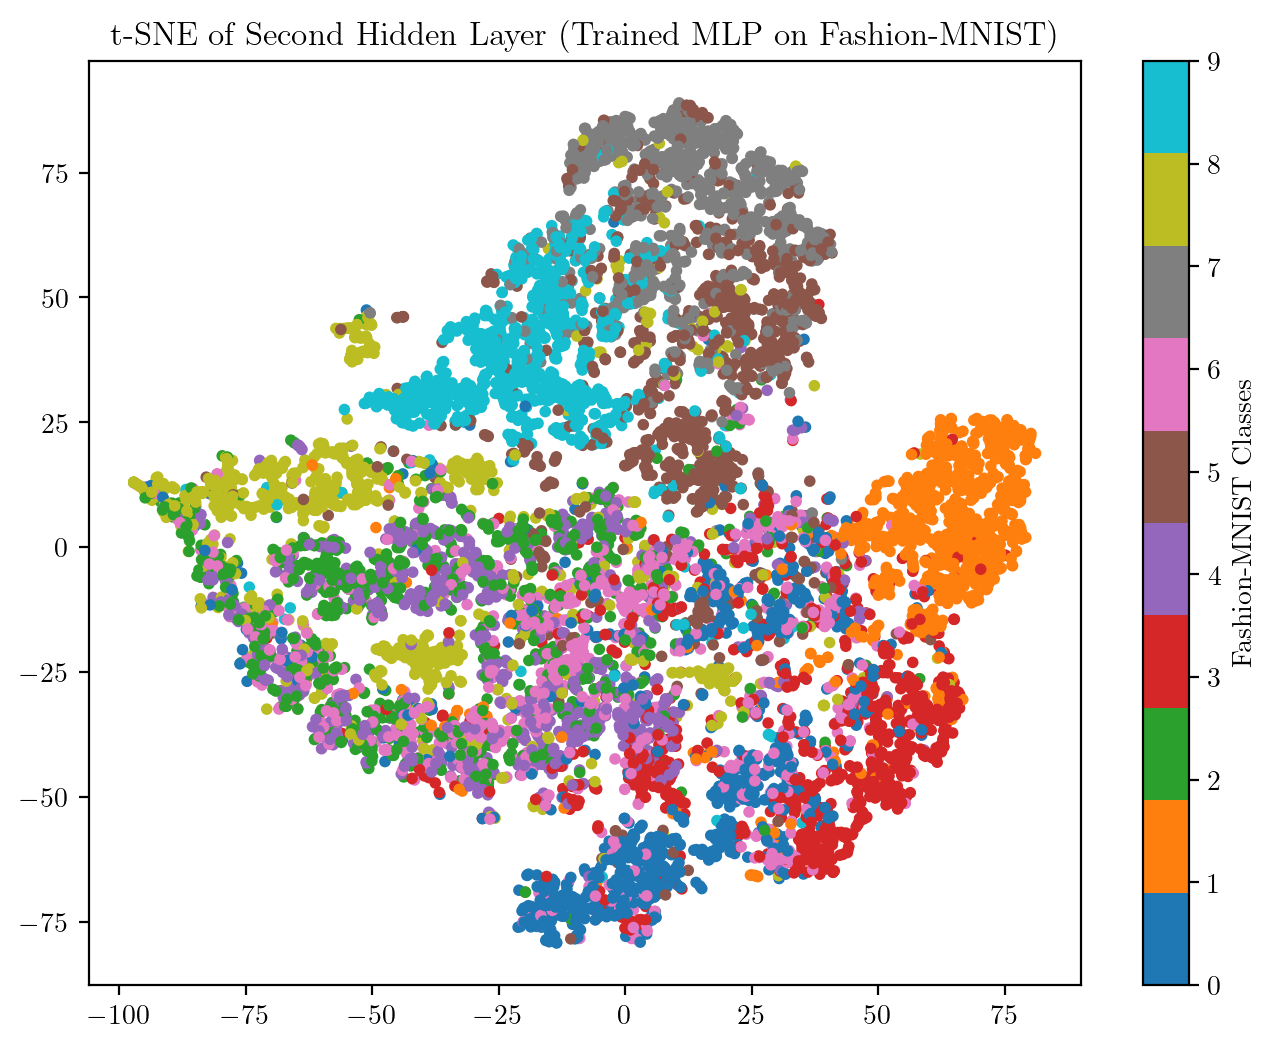

In [ ]:
# Plot t-SNE for MNIST
plt.figure(figsize=(8, 6))
scatter_mnist = plt.scatter(tsne_results_mnist[:, 0], tsne_results_mnist[:, 1],
                            c=mnist_labels, cmap='tab10', s=10)
plt.title("t-SNE of Second Hidden Layer (Trained MLP on MNIST)")
plt.colorbar(scatter_mnist, ticks=range(10), label='MNIST Digits')
plt.show()

# Plot t-SNE for Fashion-MNIST
plt.figure(figsize=(8, 6))
scatter_fashion = plt.scatter(tsne_results_fashion[:, 0], tsne_results_fashion[:, 1],
                              c=fashion_labels, cmap='tab10', s=10)
plt.title("t-SNE of Second Hidden Layer (Trained MLP on Fashion-MNIST)")
plt.colorbar(scatter_fashion, ticks=range(10), label='Fashion-MNIST Classes')
plt.show()


## t-SNE on Trained MLP:

We get distinct clusters for each of the 10 digits (0-9). Hence, the trained model has learned features that separate the classes effectively, so the embeddings produced by the second hidden layer (with 20 neurons) capture these distinctive features.
The clusters are more compact and well-separated, indicating that the model can identify unique characteristics for each digit class. This is evidence of the model’s ability to create distinct internal representations for each digit.


## t-SNE on Untrained MLP:

In contrast, t-SNE on the untrained model produces less distinct or overlapping clusters. Since the untrained model hasn't learned any meaningful features, the output from its second hidden layer would be close to random, reflecting only the initial random weight distribution rather than patterns related to the digit classes.

## Prediction on Fashion-MNIST:

When using the trained MLP (trained on MNIST) to predict on the Fashion-MNIST dataset, the model's performance is expected to be poor, with an accuracy close to random guessing (around 10%). This is because the model was trained specifically to recognize digits, not clothing items, and it has not learned features relevant to Fashion-MNIST.
t-SNE Visualization for Fashion-MNIST Embeddings:

The t-SNE visualization of the Fashion-MNIST embeddings from the trained MLP model show overlapping clusters or poor separation between different classes of clothing items. Embeddings from Fashion-MNIST are not well-organized, since the model has not learned to separate these new categories effectively.

## Comparison of MNIST and Fashion-MNIST t-SNE:

For MNIST, the t-SNE plot shows clear separation because the model has been trained to distinguish between the classes. For Fashion-MNIST, however, the t-SNE plot would be less organized and more interspersed, demonstrating the model's inability to generalize well to this new, unrelated dataset.
This shows that, while some underlying structures or edges are captured, the model's representations are not meaningful for Fashion-MNIST. It further highlights the importance of dataset-specific training to achieve class-specific embeddings.
